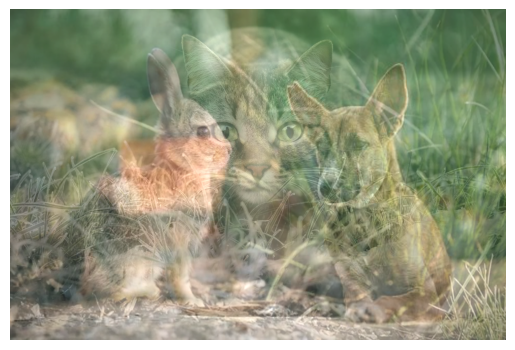

In [1]:
from PIL import Image
import numpy as np
import pathlib
import cv2
import matplotlib.pyplot as plt

# Cargar imágenes
bunny = Image.open(pathlib.Path('animals/bunny/00002.jpg'))
cat = Image.open(pathlib.Path('animals/cat/00007.jpg'))
dog = Image.open(pathlib.Path('animals/dog/00014.jpg'))

# Redimensionar imágenes al tamaño de la imagen de gato
cat_size = cat.size
bunny = bunny.resize(cat_size)
dog = dog.resize(cat_size)

# Convertir imágenes a arrays numpy
bunny = np.array(bunny)
cat = np.array(cat)
dog = np.array(dog)

# Normalizar las imágenes
bunny = bunny / 255.0
cat = cat / 255.0
dog = dog / 255.0

# Combinación ponderada de las imágenes
merged = (bunny * 0.33  + cat * 0.33 + dog * 0.33)

# Reajustar los valores de los píxeles al rango [0, 255]
merged = (merged * 255).astype(np.uint8)

# Convertir a imagen PIL
merged_image = Image.fromarray(merged)

# Ajustar contraste y brillo con OpenCV
merged_image_cv = cv2.cvtColor(np.array(merged_image), cv2.COLOR_RGB2BGR)
# Alpha es el contraste, beta es el brillo
merged_image_cv = cv2.convertScaleAbs(merged_image_cv, alpha=1.2, beta=30)

# Convertir de nuevo a PIL Image
final_image = Image.fromarray(cv2.cvtColor(merged_image_cv, cv2.COLOR_BGR2RGB))

# Mostrar o guardar la imagen final
plt.imshow(final_image)
plt.axis('off') # Ocultar los ejes
plt.show()
# final_image.show()
# final_image.save('output.jpg')